In [117]:
import matplotlib.pyplot as plt
import numpy as np
from crossbar import Crossbar

from read_1t1r_data import read_1t1r_data

from matplotlib import rcParams
rcParams.update({'figure.figsize': (12,6)})

In [118]:
_, prog_data, filenames = read_1t1r_data(dir='.', type='Prog')

print(f"{len(prog_data)} devices tested using the analog programming test method Prog")

20 devices tested using the analog programming test method Prog


In [119]:
def get_lrs_by_voltage(device): 
    LRS_by_voltage = []

    # for each voltage value
    for v_i in range(200):
        LRS_by_voltage.append([])

        # grab the LRS from each group
        for group_j in range(10):
            LRS_by_voltage[-1].append(device['LRS'][v_i + group_j*200])
    
    return np.asarray(LRS_by_voltage)

this is a bit of a failed idea, the std. dev. is too high. maybe it's better to just sample from the actual data instead of creating a synthetic dataset

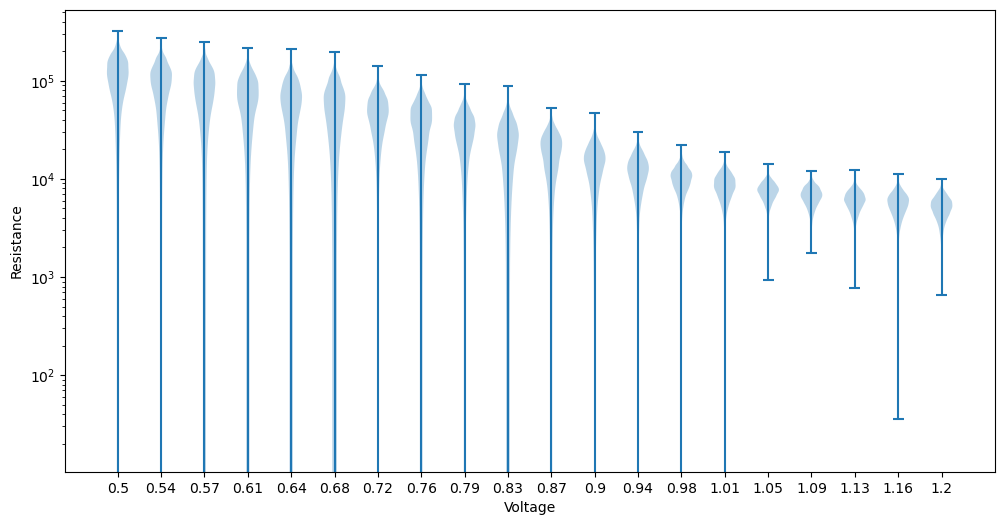

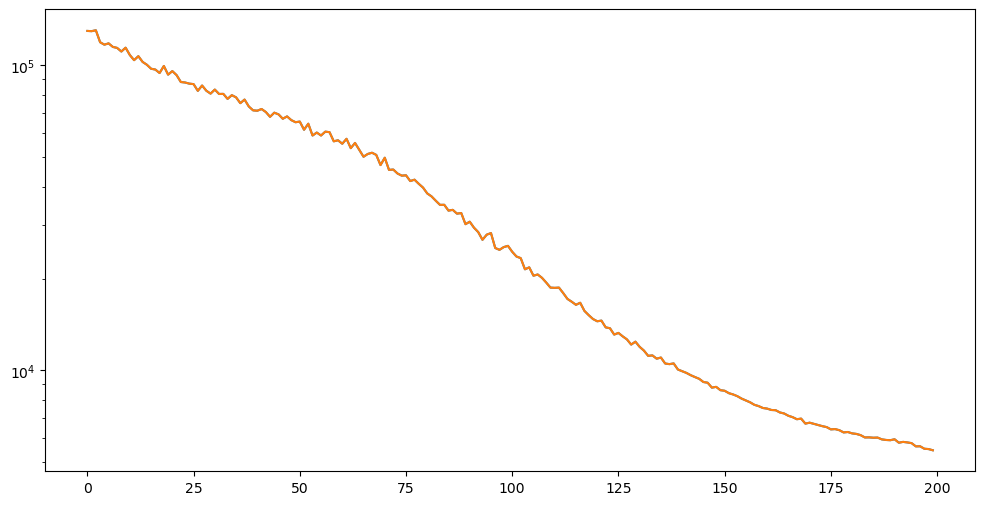

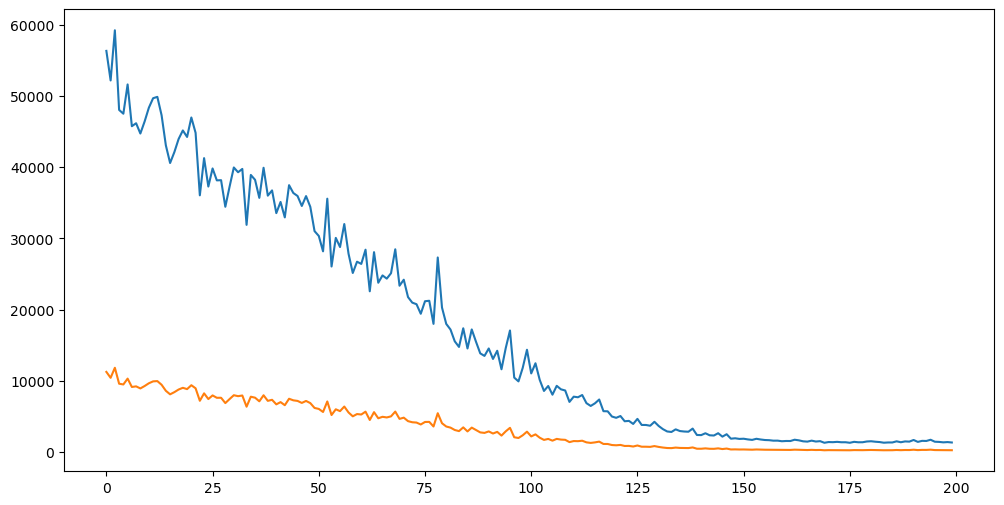

In [120]:
# mask will grab 20 elements in a list of 200
mask = np.linspace(1, 200, 20, dtype=np.int16) - 1

r_b_v = get_lrs_by_voltage(prog_data[0])
for d in prog_data[1:]:
    r_b_v = np.append(r_b_v, get_lrs_by_voltage(d), axis=1)

synth_r_b_v = []
means = []
stds = []
for r in r_b_v:
    synth_r_b_v.append(np.random.normal(np.mean(r), np.std(r), 5000))
    means.append(np.mean(r))
    stds.append(np.std(r))

synth_r_b_v = np.asarray(synth_r_b_v)

x_ticks = np.round(prog_data[0]['gatev'][mask], 2)

plt.violinplot(synth_r_b_v[mask].T)
plt.yscale('log')
plt.xticks(range(1, 1 + len(x_ticks)), x_ticks)
plt.ylabel('Resistance')
plt.xlabel('Voltage')
plt.show()

plt.plot(np.mean(r_b_v, axis=1))
plt.plot(means)
plt.yscale('log')
plt.show()


plt.plot(stds)
plt.plot(np.asarray(stds) * .2)
plt.show()

In [121]:
CB = Crossbar(precision=4, shape=(4, 3), max_attempts=5, threshold=.1)
CB.print_info()
CB.multiply([1,0,2,0])


resistances:
 [[ 5927.29578984 22467.87094455 58877.55822991]
 [68367.65389559 51374.92133215 66941.7974542 ]
 [17273.84222073 22147.78106918  6139.09344007]
 [26088.9869255  11347.00268924  6790.13393539]]
values:
 [[15  8  4]
 [ 3  4  3]
 [ 9  8 15]
 [ 7 11 14]]
errors:
 [[-0.0226479  -0.03955454 -0.06996132]
 [-0.02773695  0.06638148 -0.00630276]
 [-0.05890184 -0.02474446 -0.05918976]
 [ 0.07699457 -0.07125066 -0.05259186]]
average error:
 -0.024125500693306167


[0.000284493, 0.0001348105, 0.0003427654]